# TP 0: Introduction to image manipulation in python

This TP is meant to be done during the lecture, and to provide insights to image manipulation in python. It will not be graded, but doing it will help you do the TP 1, as it will stress out many common mistakes that can be done in python.

In [1]:
# Numpy is the key library for manipulating arrays. 
# Use the online ressources: https://www.numpy.org/
import numpy as np 

# Matplotlib is the standard library used to show images
# The documentation is here: http://matplotlib.org/api/pyplot_api.html
# You can also check this simple intro to using ipython notebook with images:
# https://matplotlib.org/users/image_tutorial.html
import matplotlib.pyplot as plt 

# By default, the grayscale images are displayed with the jet colormap: use grayscale instead
plt.rcParams['image.cmap'] = 'gray'

# For now, keep image rescaling to "nearest"
plt.rcParams['image.interpolation'] = 'nearest'

import time

## Cellular automaton: Rule 90

For now, we are not going to directly manipulate natural images, but play with an algorithmic toy example that will be represented as images. This will allow us to cover a number of common mistakes often found in TP1.

For this, we are going to implement the [Rule 90](https://en.wikipedia.org/wiki/Rule_90) cellular automaton. 
It is 1-dimensional, and its cells have two states (1 and 0). In other words, the "state" of the automaton can be represented as a simple array of 0s and 1s.

The automaton in itself is the rule that computes the new state from the previous one. For Rule 90, the state $c_i^{t+1}$ of the cell $i$ at time $t+1$ is given with the formula ($\oplus$ being the XOR operator):
$$c_i^{t+1} = c_{i-1}^t \oplus c_{i+1}^t$$

In other words, the automaton is a transition function applied on an array of size $w$ that gives a new array of size $w$.

Why do we care about this automaton? Because if we represent a state as a black-and-white row, and if we stack successive states vertically, it can give an image like this:

![Image of Rule 90](https://upload.wikimedia.org/wikipedia/commons/5/5b/R090_rand_0.png)

And processing this image will be useful for getting familiar with numpy and image display.

**1.** We are going to represent the automaton and its evolution as a 2-dimensionnal array, that we will be able to show as an image. We want that one *row* represent the automaton at a given time (starting from the top). Complete the following code so that it will fill the matrix `J` with successive iterations of the automaton.

*(Hint: the boolean $a \oplus b$ operation can be computed with numbers as $| a - b |$ for instance)*

Elapsed time: 0.008021354675292969


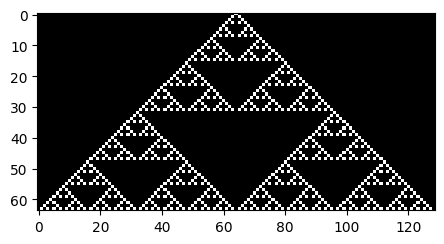

In [2]:
w = 129 # size of the automaton
T = 64 # total time

J = np.zeros((T, w)) # A bidimensional array full of zeros

J[0, w//2] = 1
# Change it so that the first row is 0 everywhere and 1 in the middle

def apply_rule90(J):
    T = J.shape[0]
    for t in range(1, T):
        # Compute the next state
        for k in range(w):
            J[t, k] = (J[t-1, k-1] + J[t-1, (k+1)%w]) % 2
    return T

t0 = time.time()

apply_rule90(J)

print("Elapsed time:", time.time() - t0)

# This code will display the figure
plt.figure(figsize=(w/25,T/25), dpi=100)
plt.imshow(J)
plt.show()

If everything works well, you should have a beautiful Sierpiński triangle on your screen. If not, you may have made a mistake.

**2.** Loops are rather slow and not very handy in python. But your matrix `J` is more than a list of lists: it is a numpy `ndarray` object, that support slices, slice assignment, element-wise operations, matrix multiplication, and much more. 

Ranges in slices are commonly written `start:end`, and it means "all elements between `start` (included) and `end` (excluded)". If `start` is missing, its value is 0; if `end` is missing, its value is the length of the array. If both, it means "every element". Negative values are valid and are counted from the end.

The full syntax is actually `start:end:step`, where `step` is the distance between 2 elements (by default 1). It can be negative.

It's easier to understand with examples:

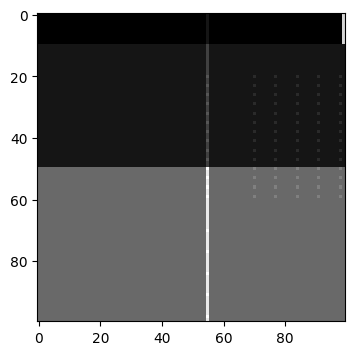

In [3]:
J = np.zeros((100, 100))

J[:, :] = 1 # All elements are set to 1
J[:, :-1] = 0 # All columns but the last one is set to 0
J[50:] = 0.5 # All first vertical half of the image set to 0.5

# More advanced:
J[10:50] = 0.1 # All rows between 10 and 50 have value 0.1
J[20:60:3, 70::7] += 0.1 # A pattern
J[:, 55] += J[20, :] + J[:, 77] # To the column 55 is added the value of row 20 * column 77

plt.figure(figsize=(4,4), dpi=100)
plt.imshow(J)
plt.show()

Assignment only works when sizes in the left and in the right side of the `=` are compatible: either they are the same, or some dimension are equal to 1 (the value is then broadcast). The last example works because `J[20, :]` (1-dimensional array of size 100) is added to `J[:, 77]` (1-dimensional array of size 100 too), and stored into `J[:, 55]` (1-dimensionnal array of size 100 too). If we want to copy a range of values from an area to another, it must match dimensions:

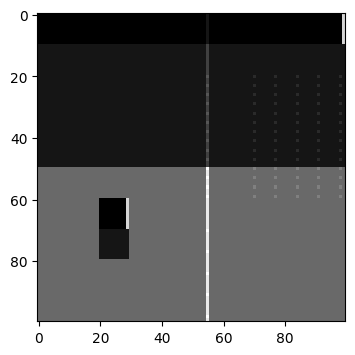

In [4]:
J[60:80, 20:30] = J[:20, -10:] # OK
#J[:, 10:20] = J[:10, :] # NOT OK : ValueError: could not broadcast

plt.figure(figsize=(4,4), dpi=100)
plt.imshow(J)
plt.show()

Rewrite your function `apply_rule90` to use the slice & assign syntax

In [21]:
w = 129 # size of the automaton
T = 64 # total time

J = np.zeros((T, w)) # A bidimensional array full of zeros

J[0, w//2] = 1 # Change it so that the first row is 0 everywhere and 1 in the middle

def apply_rule90(J):
    T = J.shape[0]
    for t in range(1, T):
        J[t] = (np.roll(J[t-1, :], 1) + np.roll(J[t-1, :], -1)) % 2
    return T

t0 = time.time()

apply_rule90(J)

print("Elapsed time:", time.time() - t0)

# This code will display the figure
plt.figure(figsize=(w/25,T/25), dpi=100)
plt.imshow(J)
plt.show()

TypeError: ufunc 'bitwise_xor' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

**3.a** Now, let's do it with a larger image. Execute the following code. What happens? Why is it so?

Elapsed time: 0.09924769401550293


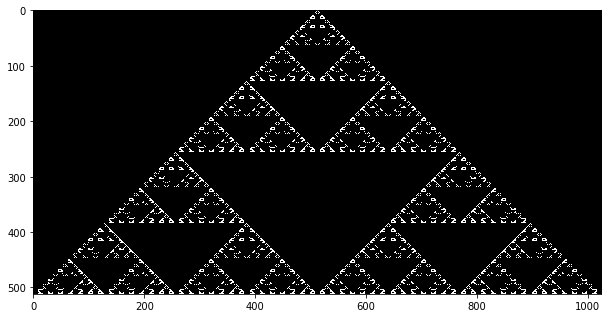

In [23]:
w = 1025 # size of the automaton
T = 512 # total time

J = np.zeros((T, w)) # A bidimensional array full of zeros

J[0, w//2] = 1

t0 = time.time()

apply_rule90(J)

print("Elapsed time:", time.time() - t0)

# This code will display the figure
plt.figure(figsize=(w/100,T/100), dpi=72)
plt.imshow(J)
plt.show()

**3.b** The command `imshow` accepts additional parameters. One of them is "interpolation". Put your cursor inside the parenthesis of the line `plt.imshow()`, and use the shortcut `Maj+Tab` to get some help about the function, and find values that may improve the display.

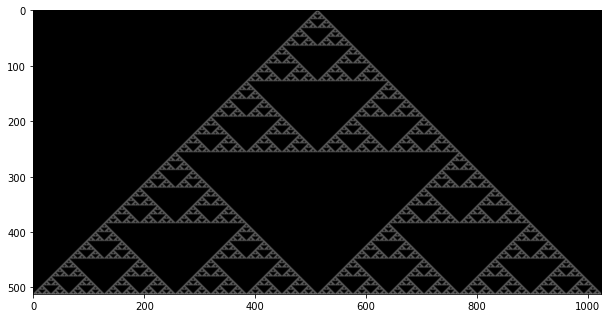

In [7]:
plt.figure(figsize=(w/100,T/100), dpi=72)
plt.imshow(J, interpolation="bicubic")
plt.show()

**4.** What is the type of the data inside `J`? What is the rule used to display it?

You can change this type on initialization with `J = np.zeros(size, dtype)`. Try setting `dtype` to `np.int` or `np.bool`. What happens? Can you improve the speed of the algorithm using booleans?

*(Hint: the `xor` operation in python is `^`)*

In [32]:
T = 1024

def apply_rule90(J):
    T = J.shape[0]
    for t in range(1, T):
        J[t] = (np.roll(J[t-1, :], 1) ^ np.roll(J[t-1, :], -1))
    return T

Elapsed time: 0.06196737289428711


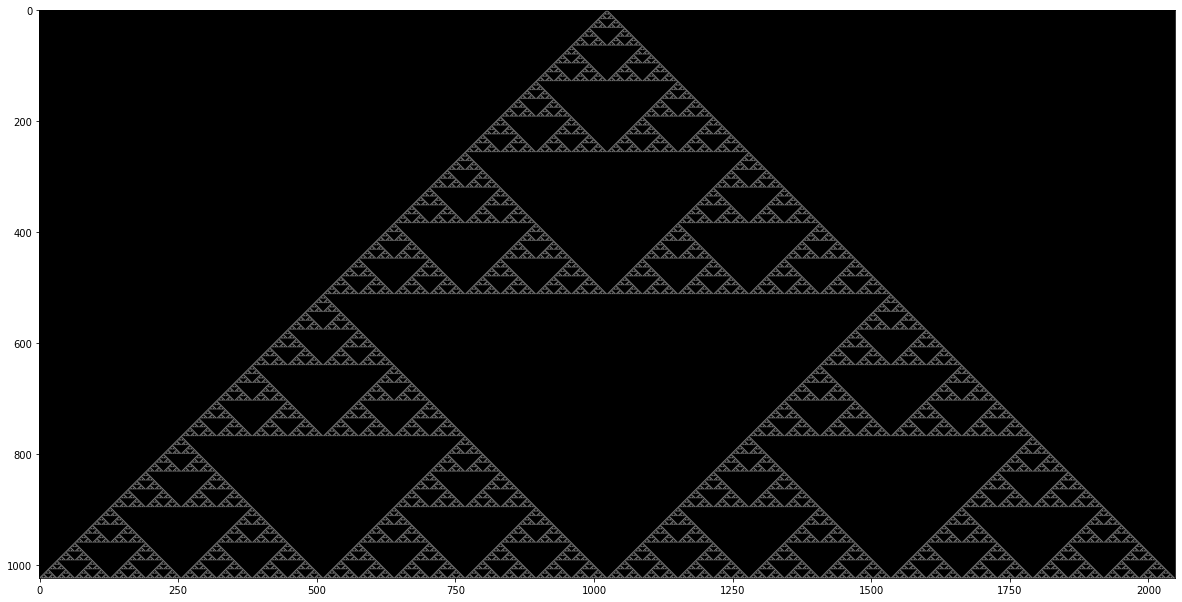

In [37]:
w = 2049 # size of the automaton
T = 1024 # total time

J = np.zeros((T, w), dtype=bool) # A bidimensional array full of zeros

J[0, w//2] = 1

t0 = time.time()

apply_rule90(J)

print("Elapsed time:", time.time() - t0)

# This code will display the figure
plt.figure(figsize=(w/100,T/100), dpi=72)
plt.imshow(J, interpolation="hamming")
plt.show()

**5.** Improve further your algorithm using `np.roll`, or your display running the following command

In [9]:
J.dtype

dtype('float64')

In [10]:
#%matplotlib notebook
# revert using 
#%matplotlib inline

## Take-away

  * It is very important to look at your images with correct rendering size and anti-aliasing, especially when you are dealing with 1-px lines
  * Don't mix X and Y axis – and diagonals
  * Check your data types